# Customer Segmentation Analysis for a Travel Agency  

**Project Type**: Data Science | Machine Learning | Business Intelligence    
**Objective**: Identifying customer segments to enhance targeted marketing strategies   




---

## Project Overview
Customer segmentation is a powerful data-driven technique that enables businesses to group customers based on shared characteristics. By understanding these segments, companies can tailor marketing strategies, improve customer engagement, and optimize business decisions.  

In this project, we analyze **customer segmentation for a travel agency** using clustering techniques. The dataset contains **2,000 customer records**, including demographic and financial attributes such as age, gender, annual income, and occupation. The goal is to identify distinct customer segments that can be targeted with customized marketing campaigns. 
<hr style="width:35%;margin-left:0;"> 

## Task

You are employed by a large travel agency to perform customer segmentation analysis. You are provided with a dataset of 2,000 customers collected through their bookings and interactions with the agency. The dataset includes variables such as customer age, gender, annual income, etc.

Your task is to analyse the data in Python using relevant techniques covered in lectures and identify distinct customer segments within the dataset. You will then compile your results into tables and diagrams and writeup a report of up to **1,000 words** (excluding tables and figures). Ensure your report is informative, intuitive, and easily understandable for management, who may not have a technical background.

Your report should address the questions listed below under the following headings:

1. **Word count** (if missing -5 marks)
    - Include the word count of your report 
2. **Introduction** (10 marks)
    - Describe the problem, explain what you aim to achieve by solving it, outline the approach you will take to address it, and specify the data you will use
3. **Exploratory Data Analysis** (20 marks)
    - Perform basic exploratory data analysis, present and comment on key summary statistics, etc.
    - Provide charts (e.g. histograms, pie charts) where appropriate
4. **Customer Segmentation** (40 marks)
    - Standardise the two numeric variables using StandardScaler
    - Choose the optimal number of customer segments/clusters using the Elbow Method and three appropriately chosen Silhouette Plots
    - After identifying the optimal number of clusters, estimate the clusters using both the K-means++ and Agglomerative Clustering techniques. (Use all variables without applying any dimensionality reduction techniques)
    - Provide a separate table for each clustering technique that contains the cluster centers (for all variables), as well as the number of customers in each cluster
    - Interpret each of the identified clusters (for both clustering techniques) in terms of customer attributes, i.e. profile the clients in each cluster
        - E.g., Cluster 1 may be a cluster of young, single females employed as managers on high incomes and living in large cities
     - Compare the customer segments identified by the two techniques. Do any clusters overlap?
6. **Recommendations** (20 marks)
    - Suggest marketing strategies and techniques that could be used to target customer segements previously identified using the K-means++ method 
7. **Conclusion** (10 marks)
    - A summary of what you have done in the report 
    
---
---


## Exploratory Data Analysis (EDA)
We explore the dataset information through the following steps to gain a comprehensive understanding of customer demographics and characteristics. This analysis is crucial for effective segmentation and targeted customer group for marketing.


Firstly, we read the dataset.

In [859]:
import pandas as pd
# Read the dataset
df = pd.read_csv('/Users/ctvyte/Documents/2024 sem 2/ BUSA8001/Assignment 2/BUSA8001_Assignment2/data/data.csv')

Then check the dataset information. The variable's type is currently integer.

In [860]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Gender           2000 non-null   int64
 1   Marital Status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement Size  2000 non-null   int64
dtypes: int64(7)
memory usage: 109.5 KB


Then we identify outliers within the numerical variables (Age and Income).

Number of outliers in Age: 4
Number of outliers in Income: 6


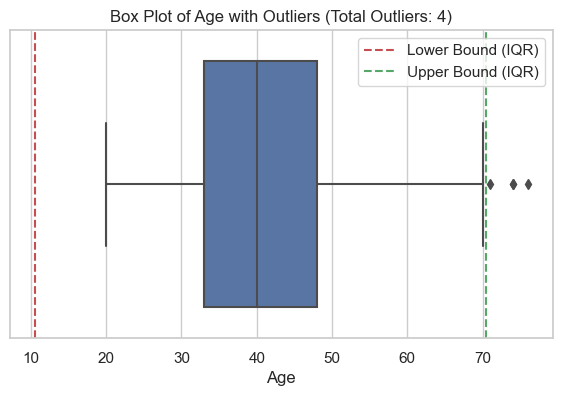

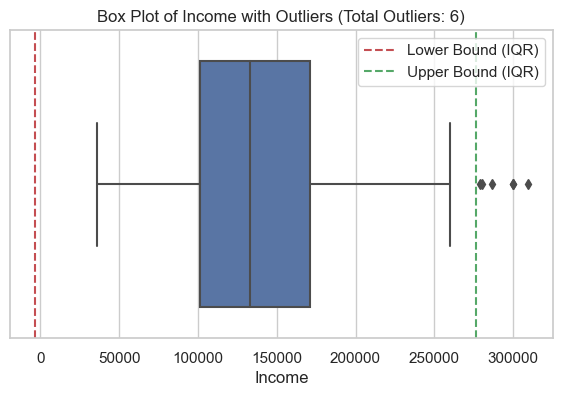

In [861]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to calculate outliers using the IQR method and count them
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound, len(outliers)

# Detect outliers for Age
age_outliers, age_lower_bound, age_upper_bound, age_outlier_count = detect_outliers_iqr(df, 'Age')

# Detect outliers for Income
income_outliers, income_lower_bound, income_upper_bound, income_outlier_count = detect_outliers_iqr(df, 'Income')

# Print the number of outliers
print(f"Number of outliers in Age: {age_outlier_count}")
print(f"Number of outliers in Income: {income_outlier_count}")

# Plot Age Outliers
plt.figure(figsize=(7, 4))
sns.boxplot(x=df['Age'])
plt.title(f'Box Plot of Age with Outliers (Total Outliers: {age_outlier_count})')
plt.axvline(age_lower_bound, color='r', linestyle='--', label='Lower Bound (IQR)')
plt.axvline(age_upper_bound, color='g', linestyle='--', label='Upper Bound (IQR)')
plt.legend()
plt.show()

# Plot Income Outliers
plt.figure(figsize=(7, 4))
sns.boxplot(x=df['Income'])
plt.title(f'Box Plot of Income with Outliers (Total Outliers: {income_outlier_count})')
plt.axvline(income_lower_bound, color='r', linestyle='--', label='Lower Bound (IQR)')
plt.axvline(income_upper_bound, color='g', linestyle='--', label='Upper Bound (IQR)')
plt.legend()
plt.show()


Despite the presence of three outliers in Age column and four outliers in Income column, the report considers retain these values. These values represent less than 1% of the dataset and are unlikely to significantly skew the clustering results. Additionally, they may reflect important niche customer segments that the travel agency could target, such as affluent individuals or older customers with specific travel needs. Removing these outliers could lead to a loss of potentially valuable insights.

Then, we double check to see if the dataset contains any null values. The result indicate there is no null value accross the columns.

In [862]:
# Checking for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Gender             0
Marital Status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement Size    0
dtype: int64


Next, we would like to know if the dataset contains any duplications. 

In [863]:
# Find and display duplicate rows
duplicate_rows = df[df.duplicated()]
print("Duplicate Rows:")
print(duplicate_rows)

print("Number of duplicate rows:", duplicate_rows.shape[0])

Duplicate Rows:
      Gender  Marital Status  Age  Education  Income  Occupation  \
1168       0               0   37          1  119959           0   
1912       0               0   34          1  102880           0   
1915       0               0   46          1  164456           0   

      Settlement Size  
1168                0  
1912                0  
1915                0  
Number of duplicate rows: 3


The report considers not to remove the duplicates. While these entries share similar attributes (e.g., age, income, marital status), they could represent different individuals with coincidentally overlapping characteristics. Removing these records without sufficient evidence may unintentionally discard valid customer data, which could introduce bias and affect the accuracy of the customer segmentation analysis

We would also like to view the distribution for each variable. Exploring value counts helps build a foundation for understanding data quality and guiding the direction of subsequent analyses, ensuring that the results are accurate and reliable.

In [864]:
# Check the distribution of categorical variables
categorical_cols = ['Gender', 'Marital Status', 'Education', 'Occupation', 'Settlement Size']
for col in categorical_cols:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())


Value counts for Gender:
1    1209
0     791
Name: Gender, dtype: int64

Value counts for Marital Status:
1    1001
0     999
Name: Marital Status, dtype: int64

Value counts for Education:
1    877
2    757
0    192
3    174
Name: Education, dtype: int64

Value counts for Occupation:
0    992
1    791
2    217
Name: Occupation, dtype: int64

Value counts for Settlement Size:
0    1130
2     798
1      72
Name: Settlement Size, dtype: int64


The following step allows the analysis to plot the distribution of all the columns, in which provide a visual summary of each column, guiding decisions on data preparation, feature selection, and analysis. 

In [865]:
import matplotlib.pyplot as plt
import seaborn as sns

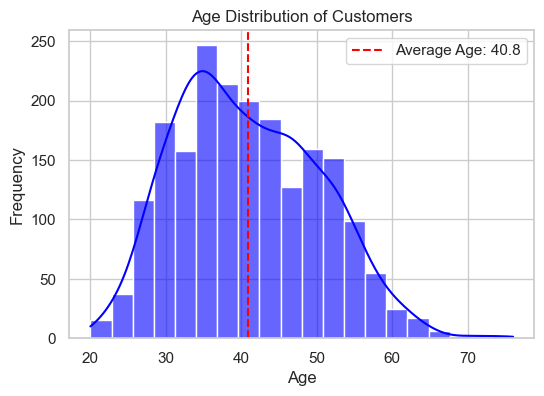

In [866]:
sns.set(style="whitegrid")
# Distribution of age
average_age = df['Age'].mean()
plt.figure(figsize=(6, 4))
sns.histplot(df['Age'], bins=20, kde=True, color='blue', alpha=0.6)
plt.axvline(average_age, color='red', linestyle='--', label=f'Average Age: {average_age:.1f}')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

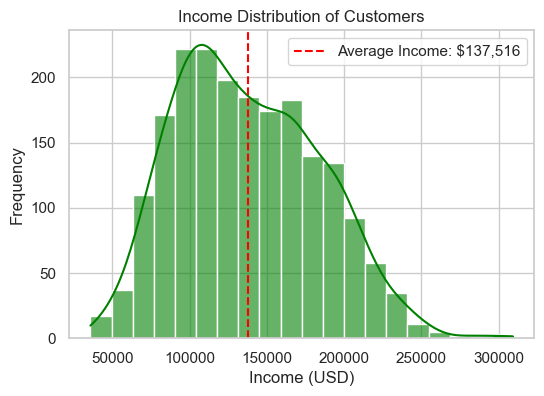

In [867]:
# The distribution of income
average_income = df['Income'].mean()
plt.figure(figsize=(6, 4))
sns.histplot(df['Income'], bins=20, kde=True, color='green', alpha=0.6)
plt.axvline(average_income, color='red', linestyle='--', label=f'Average Income: ${average_income:,.0f}')
plt.title('Income Distribution of Customers')
plt.xlabel('Income (USD)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

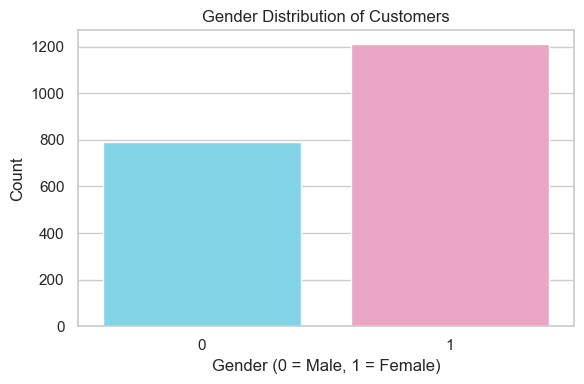

In [868]:
# The gender distribution (0 = Male, 1 = Female)
gender_colors = ['#72ddf7', '#f79ac4']  
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df, palette=gender_colors)  
plt.title('Gender Distribution of Customers')
plt.xlabel('Gender (0 = Male, 1 = Female)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

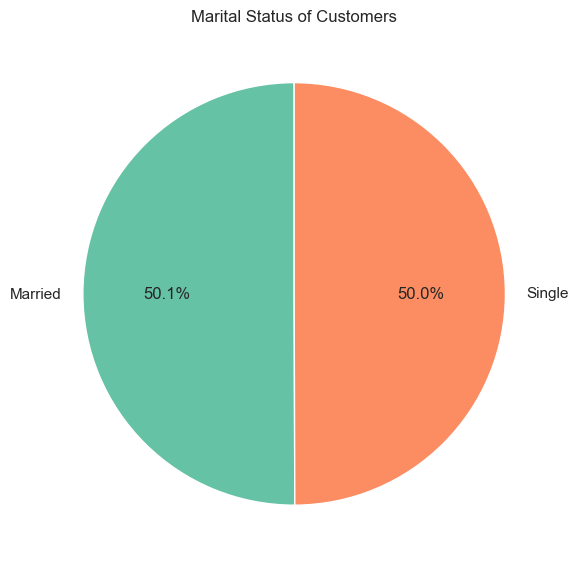

In [869]:
# The marital status distribution 
# Count the occurrences of each Marital Status
marital_status_counts = df['Marital Status'].value_counts()

# Define labels for marital status (0 = Single, 1 = Married)
marital_labels = {0: 'Single', 1: 'Married'}
marital_status_labels = marital_status_counts.index.map(marital_labels)

colors_marital = sns.color_palette('Set2')

# Visualise the pie chart
plt.figure(figsize=(6, 6))
plt.pie(marital_status_counts, labels=marital_status_labels, autopct='%1.1f%%', colors=colors_marital, startangle=90)
plt.title('Marital Status of Customers')
plt.tight_layout()
plt.show()

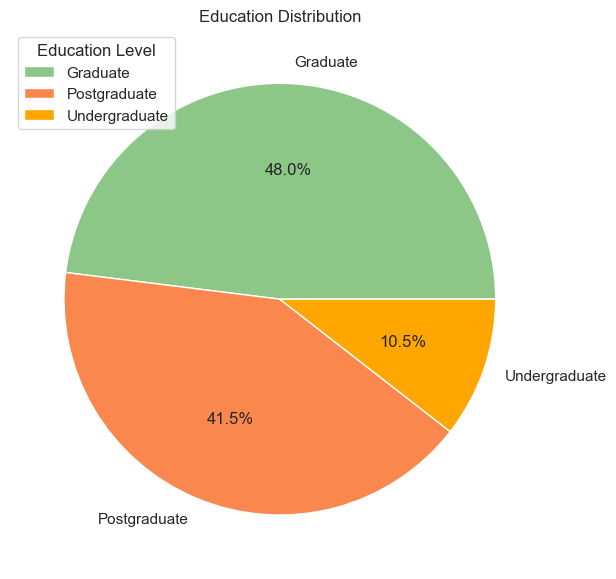

In [870]:
# Distribution of customer education
education_labels = {0: 'Undergraduate', 1: 'Graduate', 2: 'Postgraduate'}
plt.figure(figsize=(12, 6))
colors_education = ['#8cc788', '#f9874e', '#ffa600']

plt.subplot(1, 2, 1)
education_counts = df['Education'].map(education_labels).value_counts()  # Mapping Education labels
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', colors=colors_education)
plt.title('Education Distribution')
plt.legend(education_counts.index, title="Education Level", loc="best")

plt.tight_layout()
plt.show()

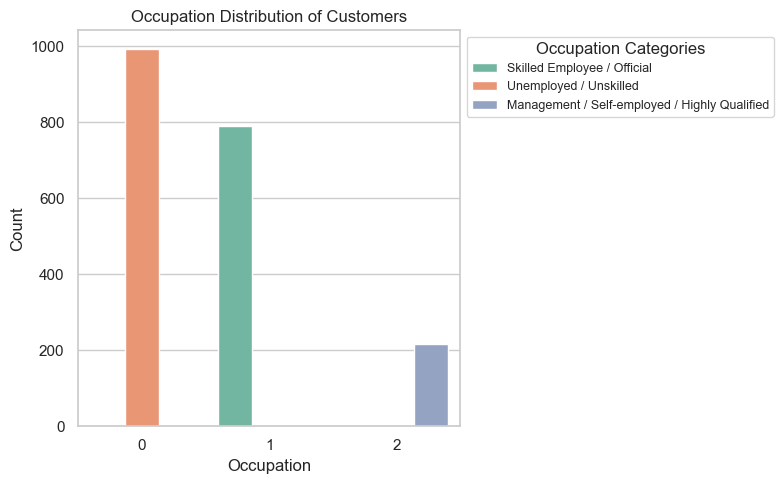

In [871]:
# Distribution of customer occupation
# Define the mapping for occupation categories
occupation_labels = {
    0: 'Unemployed / Unskilled',
    1: 'Skilled Employee / Official',
    2: 'Management / Self-employed / Highly Qualified'
}

# Map the Occupation column 
df['Occupation Label'] = df['Occupation'].map(occupation_labels)

# Occupation plot 
plt.figure(figsize=(8, 5))
sns.countplot(x='Occupation', data=df, palette='Set2', hue='Occupation Label')
plt.title('Occupation Distribution of Customers')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.legend(title='Occupation Categories', bbox_to_anchor=(1, 1), loc='upper left', fontsize=9)
plt.tight_layout()
plt.show()

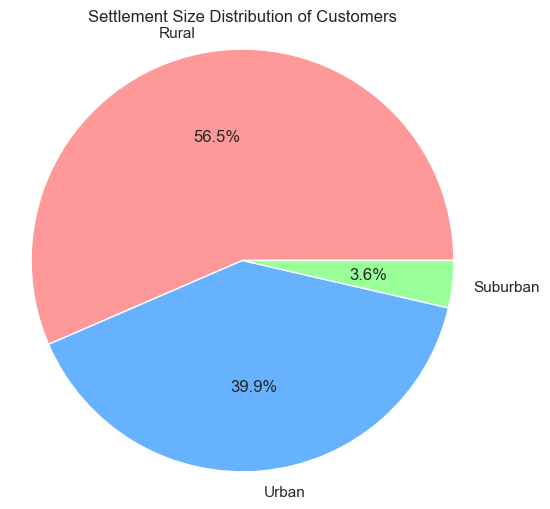

In [872]:
# Define labels for Settlement Size
settlement_labels = {0: 'Rural', 1: 'Suburban', 2: 'Urban'}
df['Settlement Label'] = df['Settlement Size'].map(settlement_labels)

# Pie chart for Settlement Size
plt.figure(figsize=(6, 6))
settlement_counts = df['Settlement Label'].value_counts()
plt.pie(settlement_counts, labels=settlement_counts.index, autopct='%1.1f%%', colors=['#FF9999', '#66B2FF', '#99FF99'])
plt.title('Settlement Size Distribution of Customers')
plt.axis('equal')  
plt.show()

## Customer Segmentation
The following steps are designed to conduct a comprehensive customer segmentation analysis, ensuring accurate, well-defined customer profiles that can guide targeted marketing strategies. 

First, we standardise the numerical variables (Age and Income) to ensures that their values are on the same scale. This prevents features with larger ranges from disproportionately influencing the clustering process, leading to more balanced and reliable clusters.

In [873]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

In [874]:
#1. Standardise the Numeric Variables
# Selecting only the numeric variables 
numeric_features = ['Age', 'Income']  
X = df[numeric_features]

# Standardising the numeric variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Secondly, we choose the optimal number of customer segments/clusters using the Elbow Method and three appropriately chosen Silhouette Plots. Selecting the right number of clusters is crucial for effective segmentation. The Elbow Method helps determine where adding more clusters no longer significantly improves the segmentation. Silhouette Plots further validate the quality of the clusters, ensuring they are well-defined and distinct.

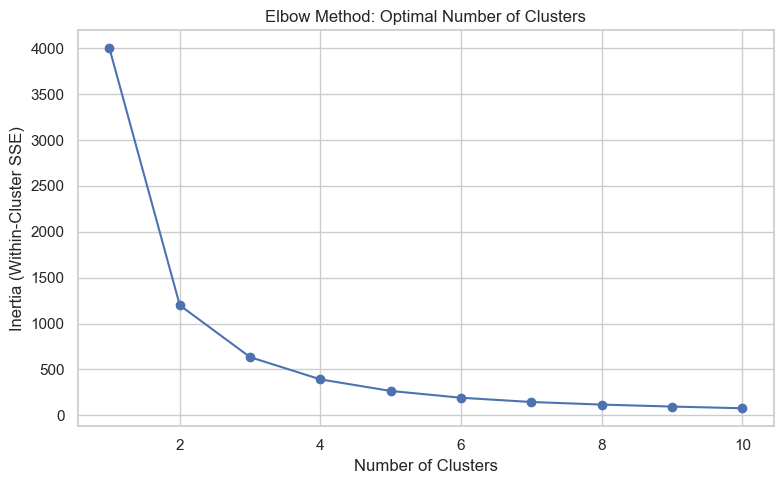

In [875]:
#2. Elbow Method to Determine Optimal Clusters
inertias = []
silhouette_scores = []  

# Compute within-cluster SSE (inertia) for k from 1 to 10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    if i > 1:  # Calculate silhouette scores only if more than one cluster
        silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
        silhouette_scores.append(silhouette_avg)

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertias, marker='o')
plt.title('Elbow Method: Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Within-Cluster SSE)')
plt.grid(True) 
plt.tight_layout()
plt.show()

To determine the optimal number of clusters, we explored different values of k using the Silhouette method. Silhouette coefficients were computed for each observation in the dataset, and the average Silhouette score was used to assess the quality of clustering. Below are the results for k = 2, k = 3 and k = 4, which were compared to identify the most well-defined clusters.

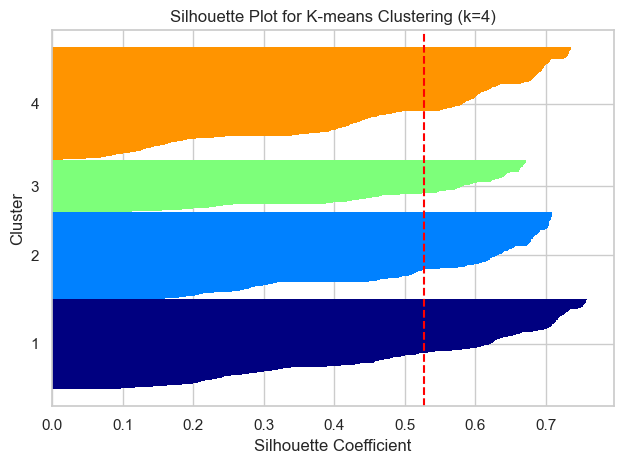

Average silhouette score for k=4: 0.53


In [876]:
# Perform KMeans clustering with 4 clusters
km = KMeans(n_clusters=4,  
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km = km.fit_predict(X_scaled)  # X_scaled is the standardised dataset

# Get unique cluster labels
cluster_labels = np.unique(y_km)

# Compute the silhouette scores for each sample
silhouette_vals = silhouette_samples(X_scaled, y_km, metric='euclidean')

# Plot the silhouette plot
y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / 4)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)

# Calculate the average silhouette score and plot
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette Coefficient')
plt.title('Silhouette Plot for K-means Clustering (k=4)')
plt.tight_layout()
plt.show()

# Print the average silhouette score
print(f"Average silhouette score for k=4: {silhouette_avg:.2f}")

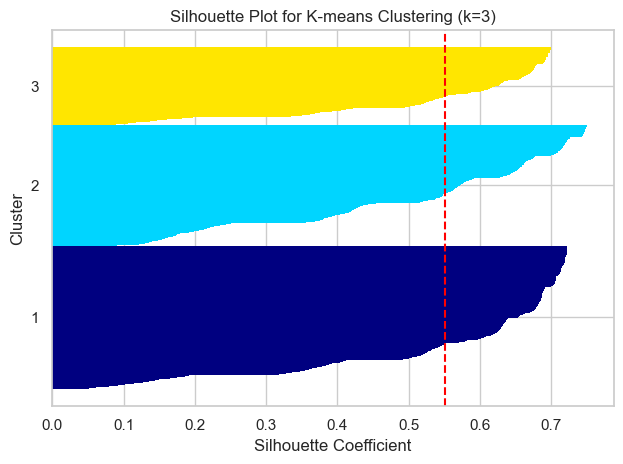

Average silhouette score for k=3: 0.55


In [877]:
# Generate Silhouette Plots with k = 3
from sklearn.metrics import silhouette_samples
import numpy as np
from matplotlib import cm

km = KMeans(n_clusters=3,  
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km = km.fit_predict(X_scaled)  # X_scaled is the standardised dataset

# Get unique cluster labels
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]

# Compute the silhouette scores for each sample
silhouette_vals = silhouette_samples(X_scaled, y_km, metric='euclidean')

# Plot the silhouette plot
y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)

# Calculate the average silhouette score and plot
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette Coefficient')
plt.title('Silhouette Plot for K-means Clustering (k=3)')
plt.tight_layout()
plt.show()

# Print the average silhouette score
print(f"Average silhouette score for k=3: {silhouette_avg:.2f}")

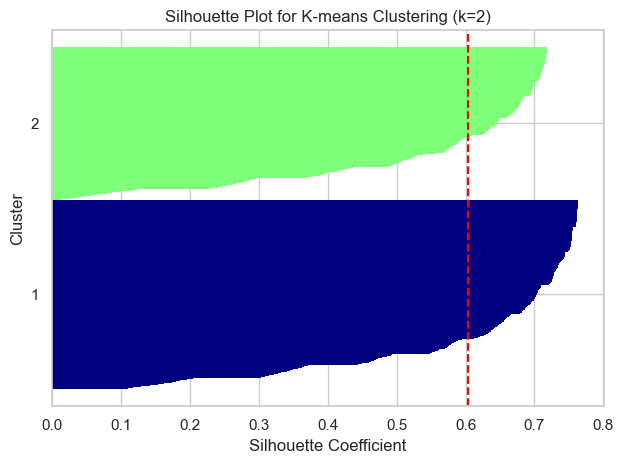

Average silhouette score for k=2: 0.60


In [878]:
# Perform KMeans clustering with 2 clusters
km = KMeans(n_clusters=2,  
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km = km.fit_predict(X_scaled)  # X_scaled is the standardised dataset

# Get unique cluster labels
cluster_labels = np.unique(y_km)

# Compute the silhouette scores for each sample
silhouette_vals = silhouette_samples(X_scaled, y_km, metric='euclidean')

# Plot the silhouette plot
y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / 2)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)

# Calculate the average silhouette score and plot
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette Coefficient')
plt.title('Silhouette Plot for K-means Clustering (k=2)')
plt.tight_layout()
plt.show()

# Print the average silhouette score
print(f"Average silhouette score for k=2: {silhouette_avg:.2f}")

The silhouette score for k = 2 is higher than that for k = 3 and k = 4, indicating that the clusters for k = 2 are more well-defined and have better internal cohesion of all.

Based on the silhouette method, k = 2 seems to offer a better balance between cluster separation and cohesion, and it is the more appropriate choice for this dataset.

Thirdly, we estimate the clusters using both K-means++ and Agglomerative Clustering techniques. By using two different clustering techniques, we can explore how the data naturally groups and compare approaches. 

In [879]:
#3. 
# Select all features 
features = ['Age', 'Income', 'Gender', 'Marital Status', 'Education', 'Occupation', 'Settlement Size']
X = df[features]

# Standardise only the numeric variables (Age and Income)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [880]:
# K-means++ clustering with 2 clusters
kmeans = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, random_state=0)
df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

# Agglomerative clustering with 2 clusters 
agglo = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
df['Agglo_Cluster'] = agglo.fit_predict(X_scaled)

# Show the resulting cluster assignments
print("K-means++ Cluster Assignments:\n", df['KMeans_Cluster'].value_counts())
print("Agglomerative Clustering Assignments:\n", df['Agglo_Cluster'].value_counts())

K-means++ Cluster Assignments:
 1    1002
0     998
Name: KMeans_Cluster, dtype: int64
Agglomerative Clustering Assignments:
 0    1045
1     955
Name: Agglo_Cluster, dtype: int64


/Users/ctvyte/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


The cluster sizes between the two methods are similar, indicating consistency in how the customers are being segmented when all variables are included. 
Next, we provide tables showing cluster centers and customer counts for each technique using k = 2.

In [881]:
#4. K-means++ Cluster Centers and Customer Counts
# Perform KMeans clustering with 2 clusters
kmeans = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, random_state=0)
df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)

# Inverse transform the standardised centers back to the original scale
kmeans_centers = scaler.inverse_transform(kmeans.cluster_centers_)
kmeans_centers_df = pd.DataFrame(kmeans_centers, columns=X.columns)
kmeans_centers_df['Cluster'] = range(1, 3)

# Display the K-means++ cluster centers
print("K-means++ Cluster Centers:\n", kmeans_centers_df)

# Count the number of customers in each cluster
kmeans_counts = df['KMeans_Cluster'].value_counts().sort_index()
kmeans_counts_df = pd.DataFrame(kmeans_counts).reset_index()
kmeans_counts_df.columns = ['Cluster', 'Customer Count']

# Display the K-means++ customer counts
print("K-means++ Customer Counts:\n", kmeans_counts_df)

K-means++ Cluster Centers:
          Age         Income    Gender  Marital Status  Education  Occupation  \
0  33.859719  103479.058116  0.347695        0.001002   0.807615    0.008016   
1  47.759481  171417.458084  0.860279        0.998004   2.102794    1.214571   

   Settlement Size  Cluster  
0         0.064128        1  
1         1.600798        2  
K-means++ Customer Counts:
    Cluster  Customer Count
0        0             998
1        1            1002


In [882]:
# Agglomerative Clustering Mean Values and Customer Counts
# Perform Agglomerative Clustering with 2 clusters
agglo = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
df['Agglo_Cluster'] = agglo.fit_predict(X_scaled)

# Calculate the mean of each variable for each cluster
agglo_means_df = df.groupby('Agglo_Cluster')[X.columns].mean().reset_index()

# Display the Agglomerative Clustering means
print("Agglomerative Clustering Mean Values:\n", agglo_means_df)

# Count the number of customers in each cluster
agglo_counts = df['Agglo_Cluster'].value_counts().sort_index()
agglo_counts_df = pd.DataFrame(agglo_counts).reset_index()
agglo_counts_df.columns = ['Cluster', 'Customer Count']

# Display the Agglomerative Clustering customer counts
print("Agglomerative Clustering Customer Counts:\n", agglo_counts_df)


Agglomerative Clustering Mean Values:
    Agglo_Cluster        Age         Income    Gender  Marital Status  \
0              0  47.711005  171178.800000  0.827751        0.957895   
1              1  33.286911  100681.201047  0.360209        0.000000   

   Education  Occupation  Settlement Size  
0   2.056459    1.166507         1.536842  
1   0.800000    0.006283         0.064921  
Agglomerative Clustering Customer Counts:
    Cluster  Customer Count
0        0            1045
1        1             955


/Users/ctvyte/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


For interpretion of the identified clusters in terms of customer attributes and recommentions, please refer to Report.